In [1]:
import pandas as pd

In [2]:
#reading csv file into dataframe
df=pd.read_csv('http://bit.ly/w-data')

In [3]:
df


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
df.info

<bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [7]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

Text(0, 0.5, 'Frequency')

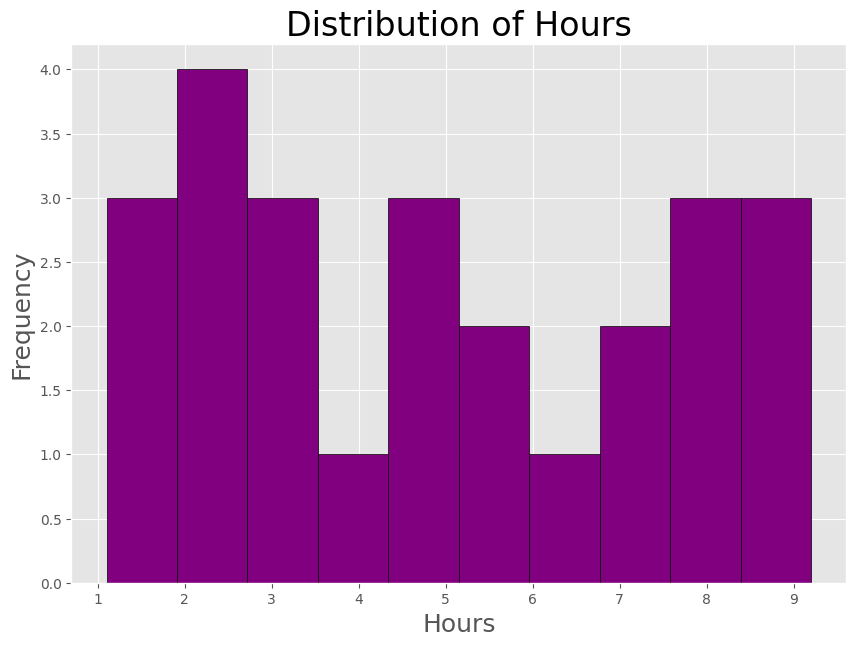

In [8]:
#plotting distribution of study hours
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# histogram of the Hours
df.Hours.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Hours', size=24)
plt.xlabel('Hours', size=18)
plt.ylabel('Frequency', size=18)

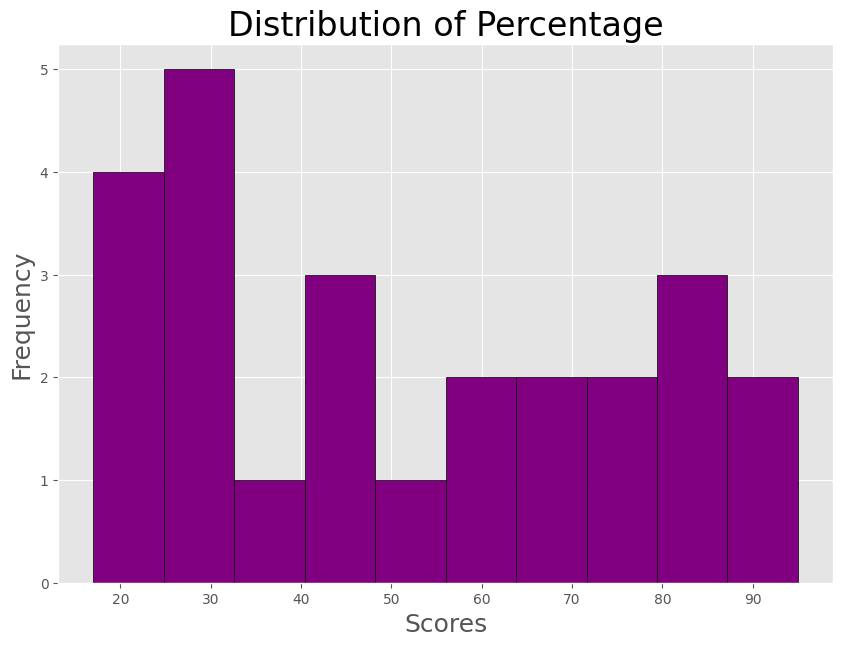

In [9]:
# histogram of the Scores
df.Scores.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Percentage', size=24)
plt.xlabel('Scores', size=18)
plt.ylabel('Frequency', size=18);

In [10]:
#alloting X as independent variable and Y as dependent variable
X = df["Hours"].values.reshape(-1,1)
Y = df["Scores"].values.reshape(-1,1)

In [11]:
#splitting data for training and testing model
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=0) 

In [12]:
#linear regression
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

In [13]:
#y=b0+xb1
#fitting a line to show the linear relation between indepedent variable and dependent variable
line = regressor.coef_*X+regressor.intercept_

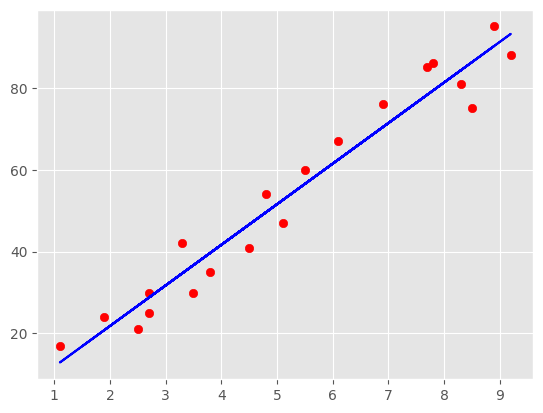

In [16]:
#visualise the training data
plt.scatter(X_train, y_train,color="red")
plt.plot(X, line,color='b');
plt.show()

In [17]:
#predicting using test data
Y_pred = regressor.predict(X_test)
Y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

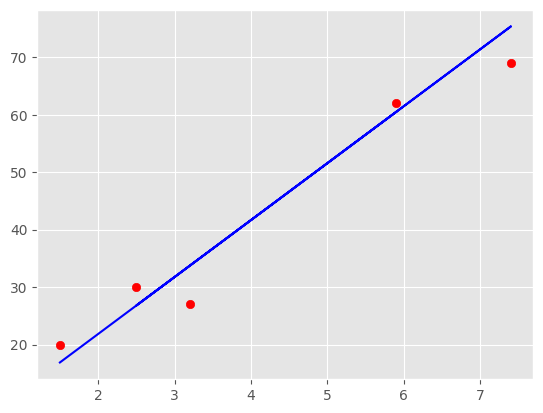

In [18]:
#visualise the test data
plt.scatter(X_test,y_test , color = "red")
plt.plot(X_test,Y_pred , color = "b")
plt.show()

In [20]:
#actual scores vs predicted scores
df_predict = pd.DataFrame({"Hours": X_test.reshape(1,-1)[0] , "Actual Scores" : y_test.reshape(1,-1)[0] , "Predicted Scores" : Y_pred.reshape(1,-1)[0]})
df_predict

,Hours,Actual Scores,Predicted Scores
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


In [21]:
#sorting the hours
df_sorted = df_predict.sort_values(by = "Hours")
df_sorted

,Hours,Actual Scores,Predicted Scores
0,1.5,20,16.884145
3,2.5,30,26.794801
1,3.2,27,33.732261
4,5.9,62,60.491033
2,7.4,69,75.357018


C:\Users\jithi\AppData\Local\Temp\ipykernel_1632\3839096004.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df_sorted["Actual Scores"], hist = False , color = "green" , label = "Actual Scores")
C:\Users\jithi\AppData\Local\Temp\ipykernel_1632\3839096004.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed29

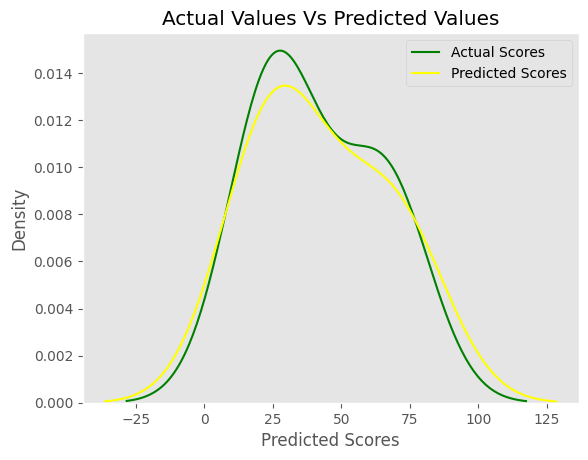

In [24]:
#visulising actual vs predicted scores
import seaborn as sns
title = "Actual Values Vs Predicted Values"
ax1 = sns.distplot(df_sorted["Actual Scores"], hist = False , color = "green" , label = "Actual Scores")
sns.distplot(df_sorted["Predicted Scores"] , hist = False , color = "yellow" , label = "Predicted Scores" , ax = ax1)
plt.legend()
plt.grid()
plt.title(title)
plt.show()

In [27]:
#computing mean absolute error correlation accuracy
from sklearn.metrics import r2_score
from sklearn import metrics

mean_absolute_error=metrics.mean_absolute_error(y_test,Y_pred)
print('Mean absolute error:',mean_absolute_error)

corr=r2_score(y_train,regressor.predict(X_train))
print('correlation:',corr)

acc=r2_score(y_test,Y_pred)
print('Accuracy:',acc)SSs

Mean absolute error: 4.183859899002975
correlation: 0.9515510725211552
Accuracy: 0.9454906892105355


In [31]:
#prediction on new data
hours = 9.25
pred = regressor.predict([[9.25]])
pred

array([[93.69173249]])